# 뉴스 기사 분류: 다중 분류 문제
로이터(Reuter) 뉴스를 46개의 상호 배타적인 토픽으로 분류하는 다중분류 신경망 구현


In [4]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 10s 5us/step


In [5]:
print(len(train_data))
print(len(test_data))

8982
2246


In [15]:
word_index = reuters.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

## 데이터 전처리

In [16]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [21]:
from keras.utils.np_utils import to_categorical

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8982, 10000)
(2246, 10000)
(8982, 46)
(2246, 46)


In [22]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [25]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [26]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 213us/step - loss: 2.4997 - acc: 0.4899 - val_loss: 1.6813 - val_acc: 0.6480
Epoch 2/20
7982/7982 [==============================] - 1s 124us/step - loss: 1.3915 - acc: 0.7038 - val_loss: 1.2790 - val_acc: 0.7190
Epoch 3/20
7982/7982 [==============================] - 1s 125us/step - loss: 1.0487 - acc: 0.7699 - val_loss: 1.1181 - val_acc: 0.7610
Epoch 4/20
7982/7982 [==============================] - 1s 125us/step - loss: 0.8246 - acc: 0.8282 - val_loss: 1.0217 - val_acc: 0.7760
Epoch 5/20
7982/7982 [==============================] - 1s 125us/step - loss: 0.6599 - acc: 0.8637 - val_loss: 0.9688 - val_acc: 0.7970
Epoch 6/20
7982/7982 [==============================] - 1s 126us/step - loss: 0.5254 - acc: 0.8931 - val_loss: 0.9200 - val_acc: 0.8090
Epoch 7/20
7982/7982 [==============================] - 1s 126us/step - loss: 0.4291 - acc: 0.9118 - val_loss: 0.9108 - val_acc: 0.8030


## 훈련과 검증 손실 그리기

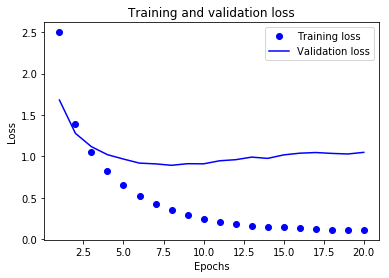

In [28]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss') # 파란색 점
plt.plot(epochs, val_loss, 'b', label='Validation loss') # 파란색 실선
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## 훈련과 검증 정확도 그리기

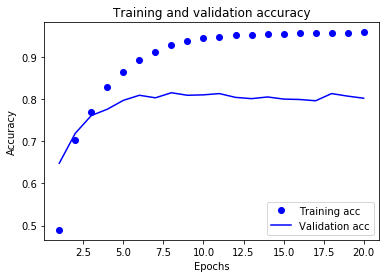

In [29]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc') # 파란색 점
plt.plot(epochs, val_acc, 'b', label='Validation acc') # 파란색 실선
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [30]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.fit(partial_x_train,
           partial_y_train,
           epochs=9,
           batch_size=512,
           validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)
print(results)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 186us/step - loss: 2.5391 - acc: 0.5228 - val_loss: 1.6732 - val_acc: 0.6570
Epoch 2/9
7982/7982 [==============================] - 1s 125us/step - loss: 1.3715 - acc: 0.7122 - val_loss: 1.2760 - val_acc: 0.7210
Epoch 3/9
7982/7982 [==============================] - 1s 126us/step - loss: 1.0149 - acc: 0.7790 - val_loss: 1.1318 - val_acc: 0.7490
Epoch 4/9
7982/7982 [==============================] - 1s 124us/step - loss: 0.7990 - acc: 0.8251 - val_loss: 1.0531 - val_acc: 0.7580
Epoch 5/9
7982/7982 [==============================] - 1s 126us/step - loss: 0.6404 - acc: 0.8618 - val_loss: 0.9759 - val_acc: 0.7940
Epoch 6/9
7982/7982 [==============================] - 1s 124us/step - loss: 0.5132 - acc: 0.8920 - val_loss: 0.9106 - val_acc: 0.8110
Epoch 7/9
7982/7982 [==============================] - 1s 125us/step - loss: 0.4137 - acc: 0.9134 - val_loss: 0.8941 - val_acc: 0.8220
Epoch 8

## 새로운 데이터에 대해 예측하기

In [37]:
predictions = model.predict(x_test)

In [38]:
predictions[0]

array([9.8606633e-06, 8.6604232e-05, 2.7169024e-05, 9.7288418e-01,
       1.5168652e-02, 1.2357265e-07, 1.1050230e-04, 3.2420332e-05,
       3.6962559e-03, 2.2215847e-06, 3.3812266e-05, 1.5436158e-03,
       6.0323000e-05, 2.9859886e-05, 5.2187761e-06, 1.9613730e-05,
       9.4001152e-04, 2.0623552e-04, 3.0937570e-04, 1.1666551e-03,
       7.9008291e-04, 5.4093229e-04, 7.4979353e-06, 6.1038088e-05,
       1.2499652e-05, 3.1505604e-04, 2.7636206e-06, 2.8468899e-05,
       7.9659512e-06, 1.0188467e-04, 3.3589508e-04, 1.8370556e-04,
       1.2651951e-05, 4.4464974e-05, 3.4730892e-05, 2.2848348e-05,
       1.8541054e-04, 4.9505587e-05, 9.4755887e-05, 2.9161078e-04,
       3.8355407e-05, 4.5707222e-04, 2.2204624e-06, 3.0289328e-05,
       6.3719344e-06, 9.3735989e-06], dtype=float32)

In [34]:
predictions[0].shape

(46,)

In [35]:
np.sum(predictions[0])

1.0000001

In [36]:
np.argmax(predictions[0])

3

In [41]:
train_labels.shape

(8982,)

## 충분히 큰 중간층을 두어야 하는 이유
정확도가 77%->69%로 하락
정보의 병목이 발생하였다.

In [42]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.fit(partial_x_train,
           partial_y_train,
           epochs=20,
           batch_size=128,
           validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 235us/step - loss: 3.1695 - acc: 0.2434 - val_loss: 2.6139 - val_acc: 0.2730
Epoch 2/20
7982/7982 [==============================] - 1s 174us/step - loss: 2.0608 - acc: 0.5465 - val_loss: 1.7022 - val_acc: 0.5860
Epoch 3/20
7982/7982 [==============================] - 1s 174us/step - loss: 1.5008 - acc: 0.6244 - val_loss: 1.5093 - val_acc: 0.6390
Epoch 4/20
7982/7982 [==============================] - 1s 172us/step - loss: 1.2873 - acc: 0.6903 - val_loss: 1.4107 - val_acc: 0.6790
Epoch 5/20
7982/7982 [==============================] - 1s 175us/step - loss: 1.1451 - acc: 0.7160 - val_loss: 1.3647 - val_acc: 0.6850
Epoch 6/20
7982/7982 [==============================] - 1s 173us/step - loss: 1.0396 - acc: 0.7311 - val_loss: 1.3427 - val_acc: 0.6980
Epoch 7/20
7982/7982 [==============================] - 1s 176us/step - loss: 0.9573 - acc: 0.7420 - val_loss: 1.3429 - val_acc: 0.6970


In [43]:
results = model.evaluate(x_test, one_hot_test_labels)
print(results)

2246/2246 [==============================] - 0s 158us/step
[1.9582121571789655, 0.6901157613535174]
